# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

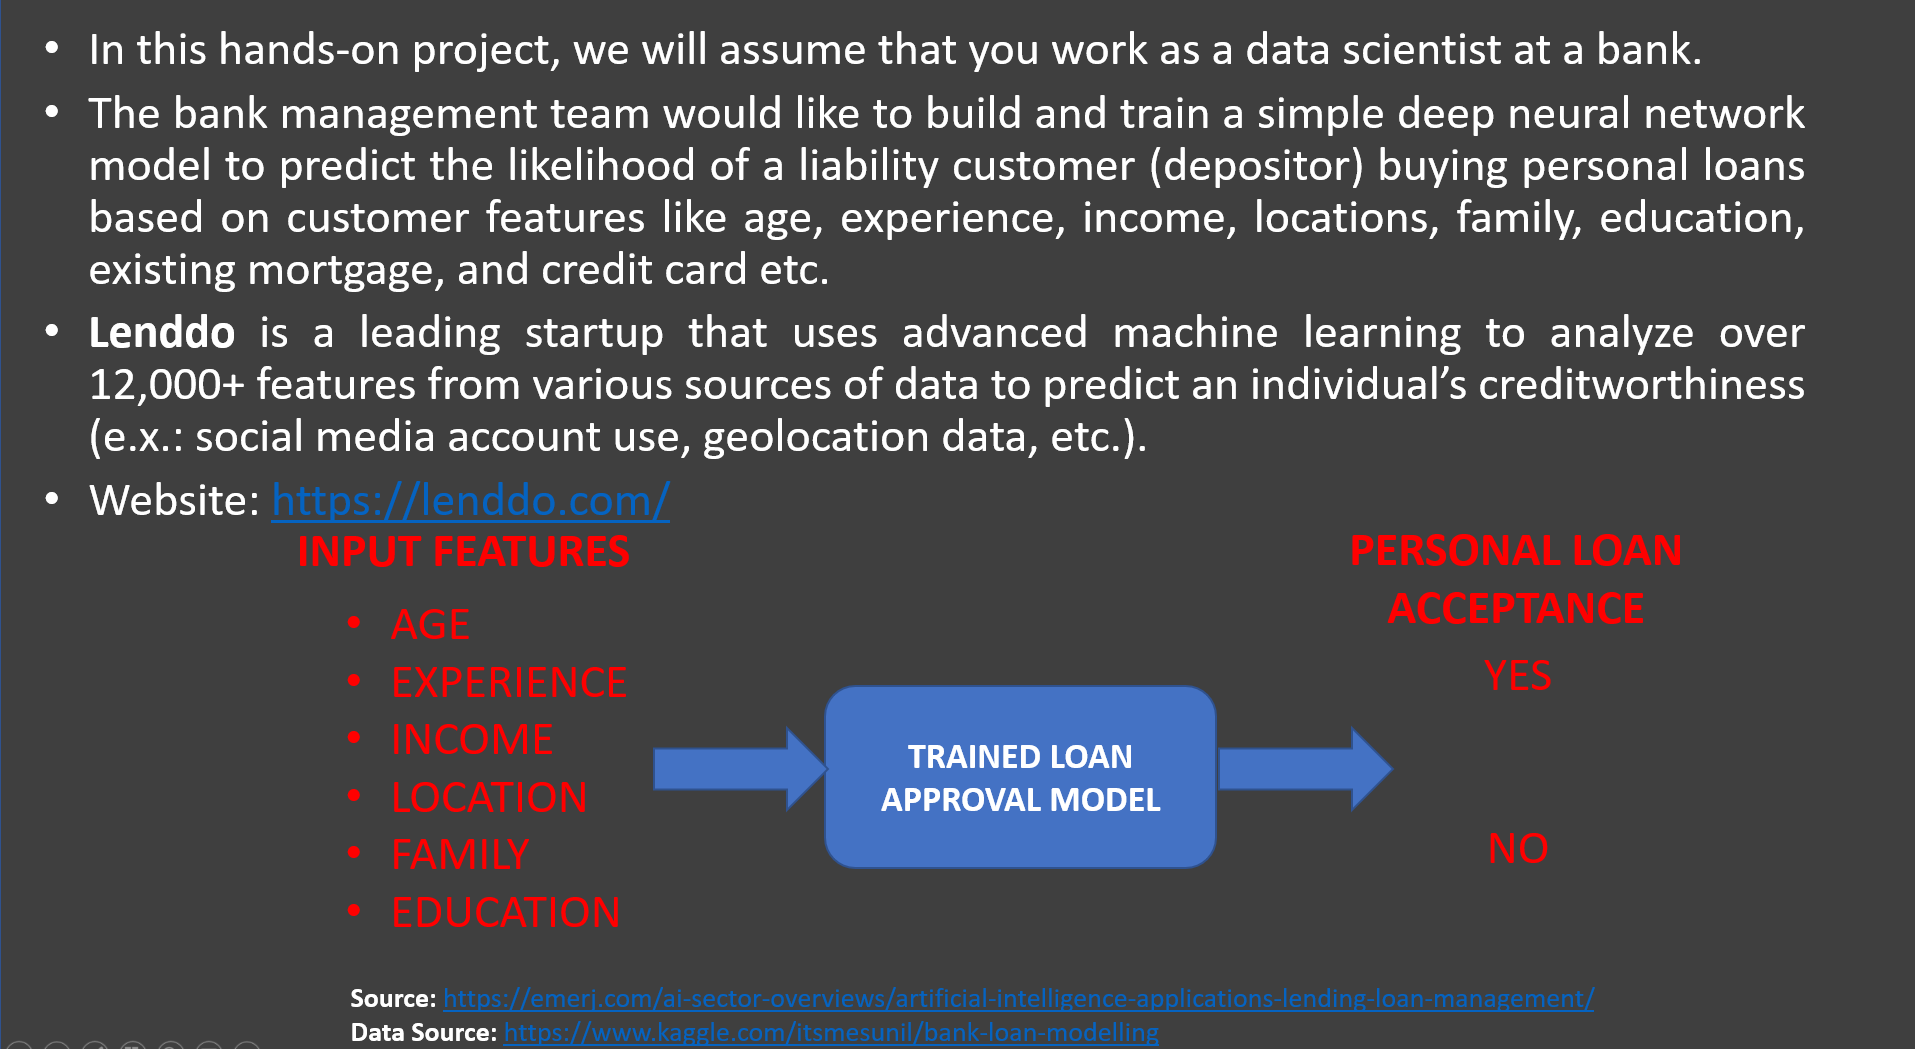

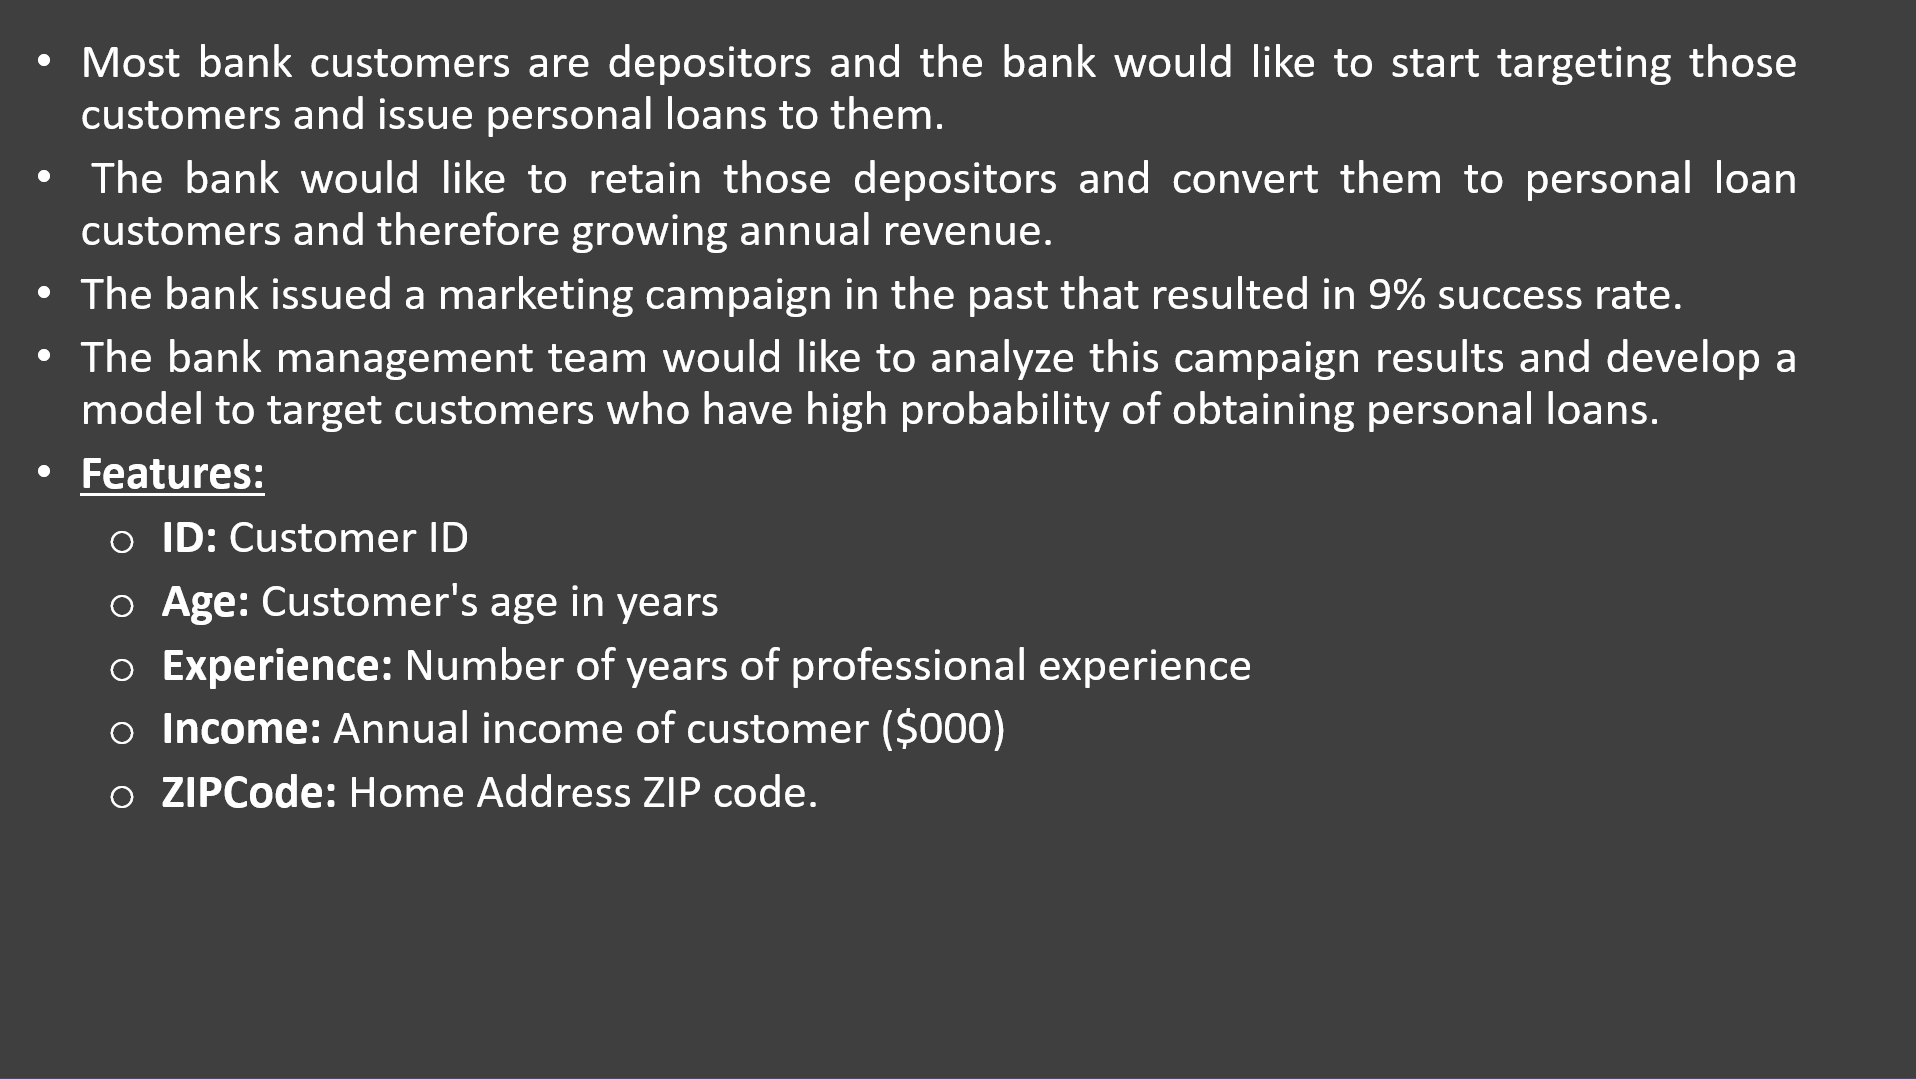

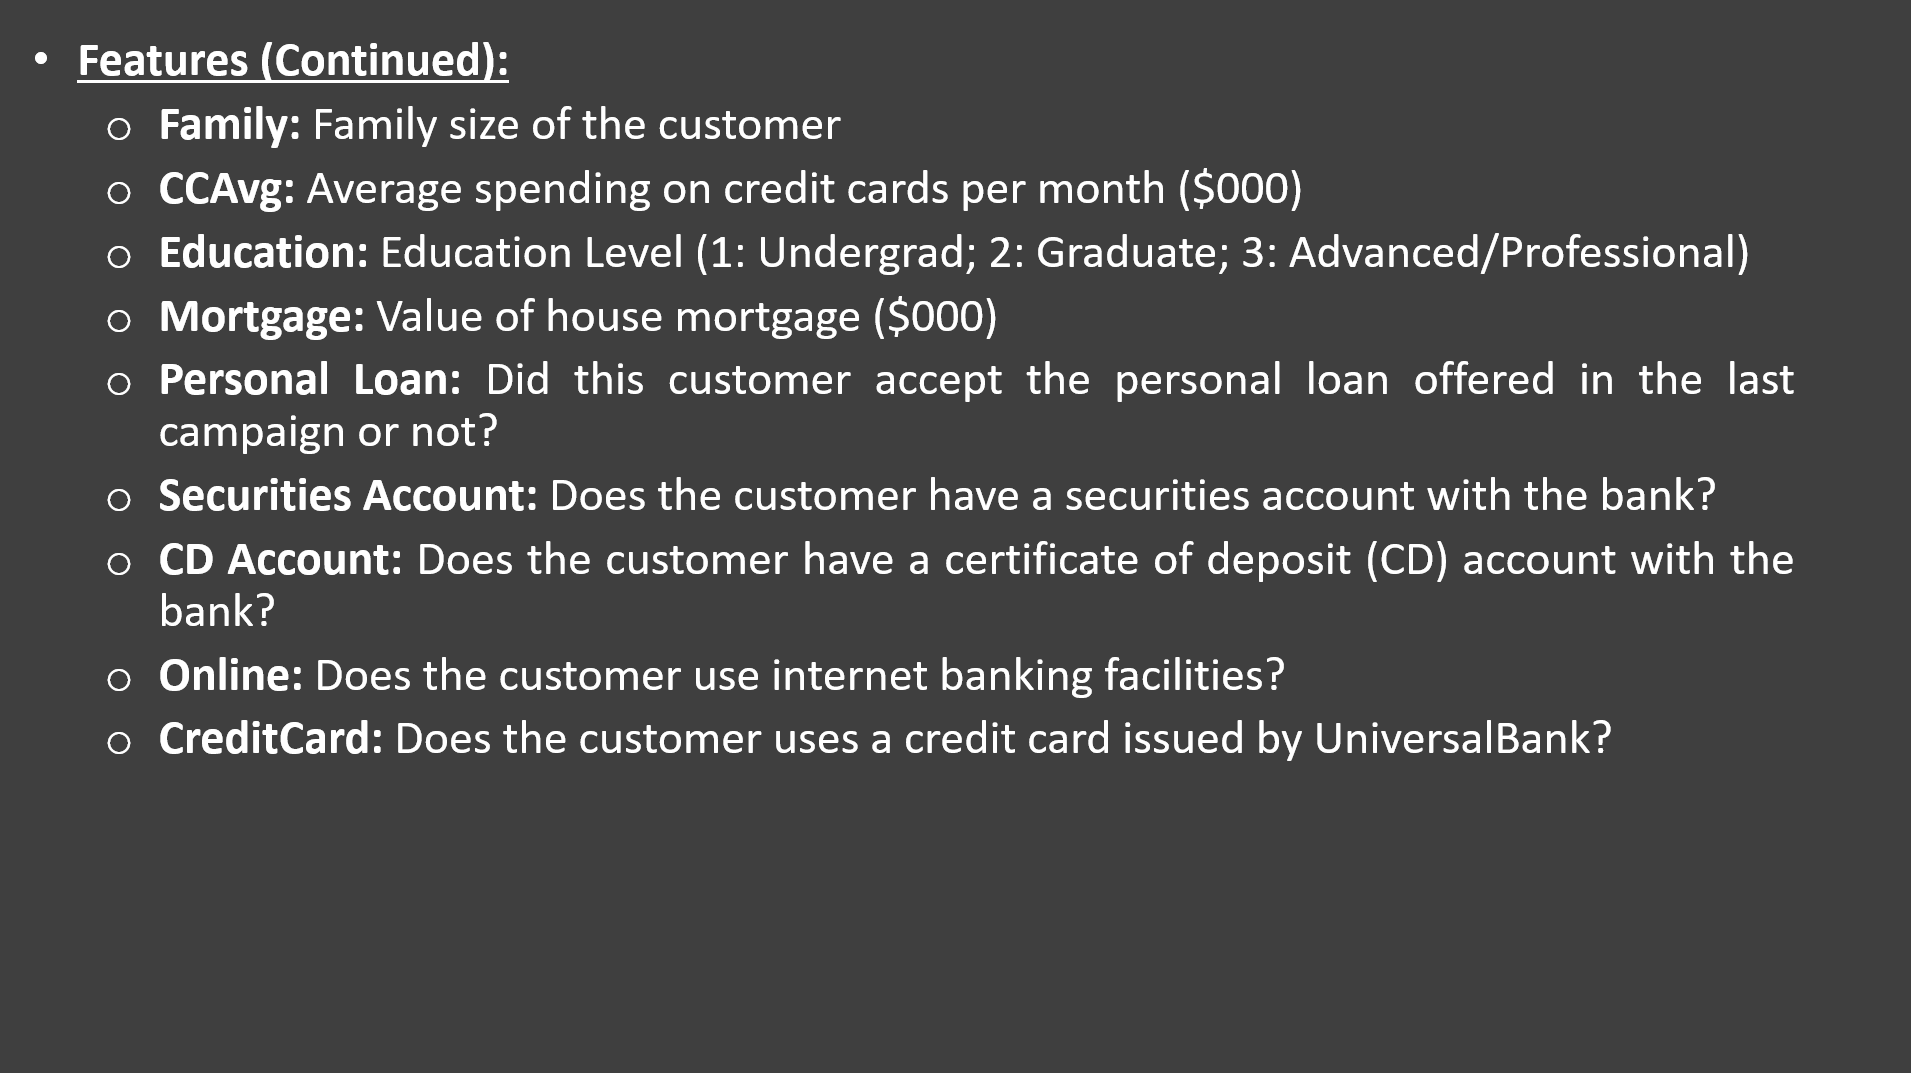

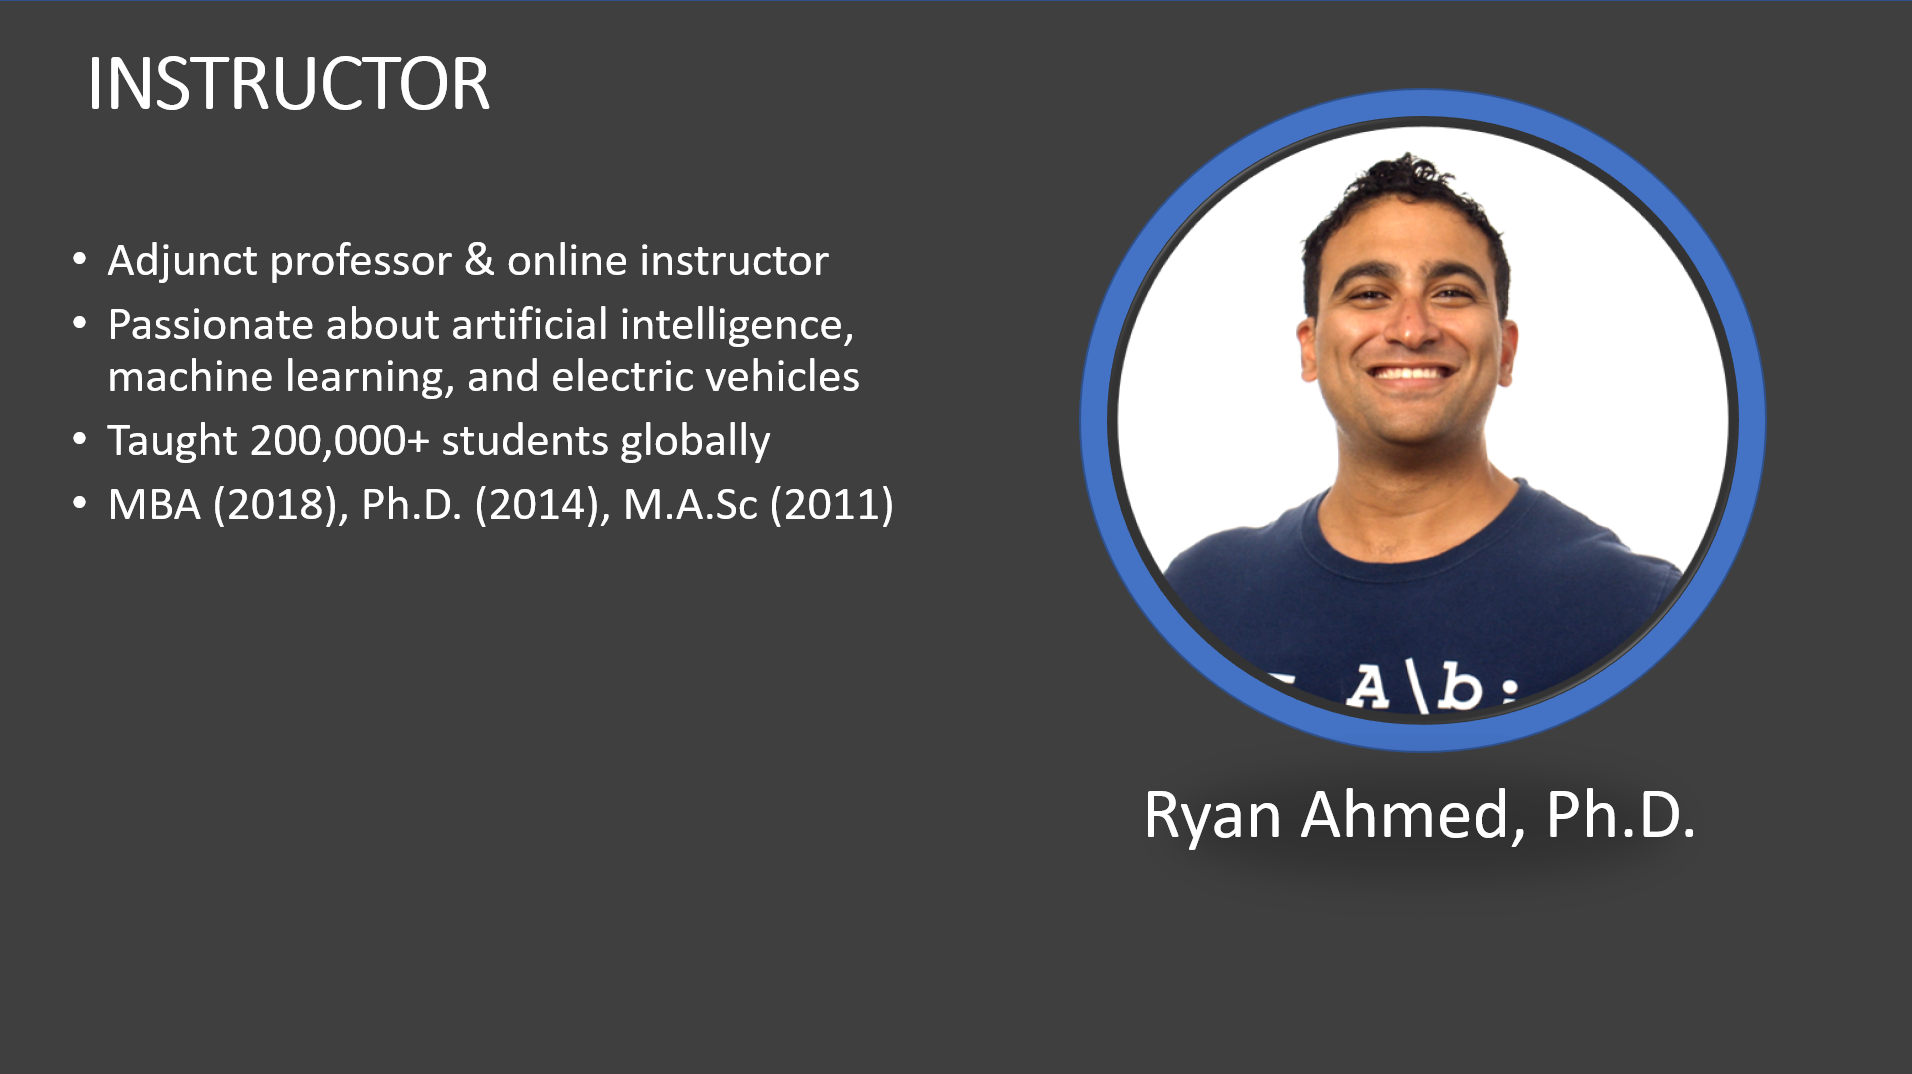

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
!python3 -m pip install jupyterthemes

In [ ]:
!python3 -m pip install pandas

In [ ]:
!python3 -m pip install seaborn


In [ ]:
!python3 -m pip install tensorflow-macos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [11]:
# Load dataset
bank_df = pd.read_csv("UniversalBank.csv")

In [13]:
# Visualize dataset
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


MINI CHALLENGE #1:
- Use bank_df.head() to show the first 10 rows in a dataframe
- Show last 10 rows in the dataframe 
- How many samples are present in the Universal Bank Dataset?


In [14]:
# Show the first 10 rows in a dataframe
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [15]:
# Show the last 10 rows in a dataframe
bank_df.tail(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [17]:
# How many samples are present in the Universal Dataset? 5000
bank_df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [18]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
# For better visualization (T Chart)
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [21]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

MINI CHALLENGE #2:
- What is the average age in this dataset?
- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?


In [25]:
# What is the average age in this dataset?
bank_df['Age'].mean()


45.3384

In [29]:
# What is the % of customers who have credit cards?
(bank_df['CreditCard'].sum() / bank_df['CreditCard'].count()) * 100


29.4

In [32]:
# What is the % of customers who accepted the personal loan?
(bank_df['Personal Loan'].sum() / bank_df['Personal Loan'].count()) * 100

9.6

# TASK #4: PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

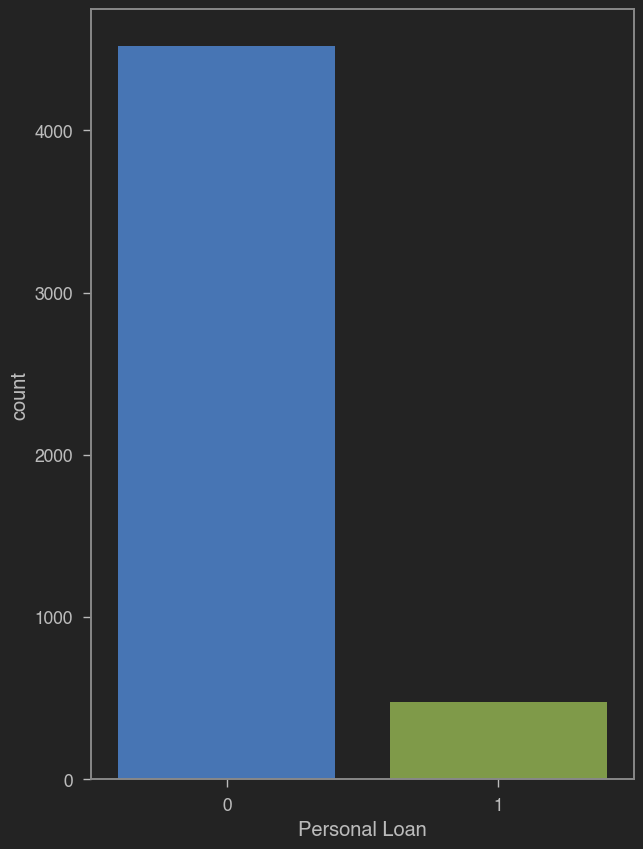

In [89]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize = (7, 10))

sns.countplot(data=bank_df, x='Personal Loan')


<AxesSubplot:xlabel='Education', ylabel='count'>

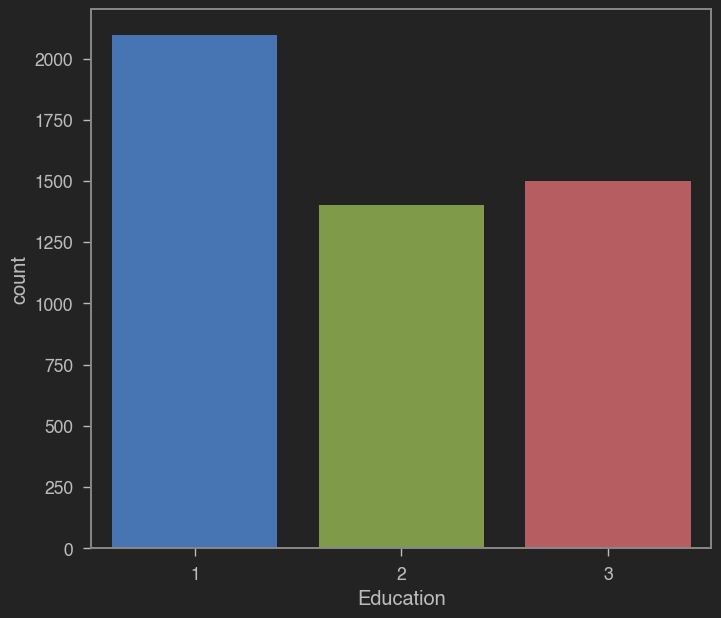

In [90]:
# Visualize Education feature
sns.countplot(bank_df, x='Education')

<AxesSubplot:xlabel='Age', ylabel='count'>

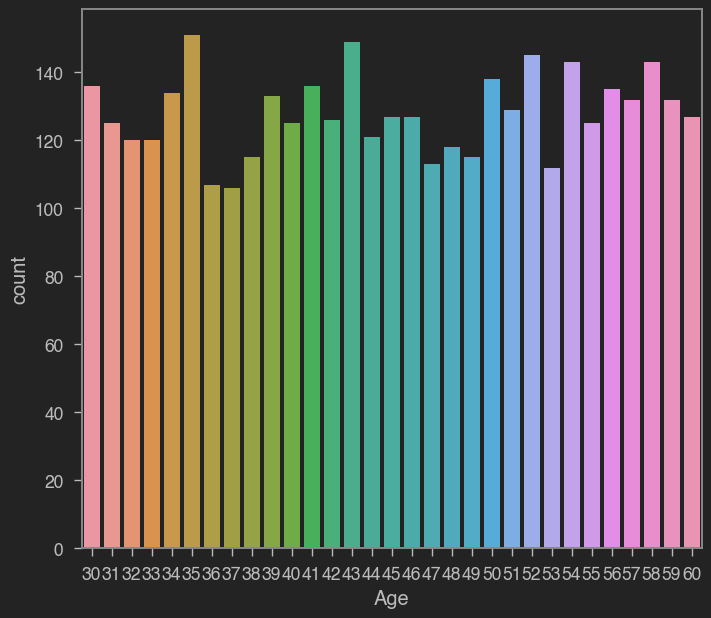

In [101]:
# Visualize Age
# Uniform distribution between 30-60 years

df = bank_df[bank_df['Age'].between(30,60)]
sns.countplot(df, x='Age')

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

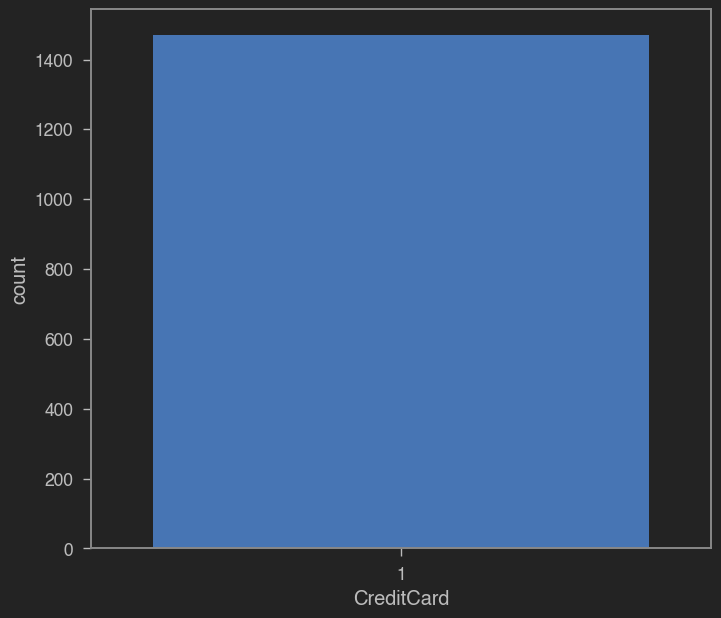

In [106]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
df = bank_df[bank_df['CreditCard'] == 1]
# df = bank_df
sns.countplot(data=df, x='CreditCard')

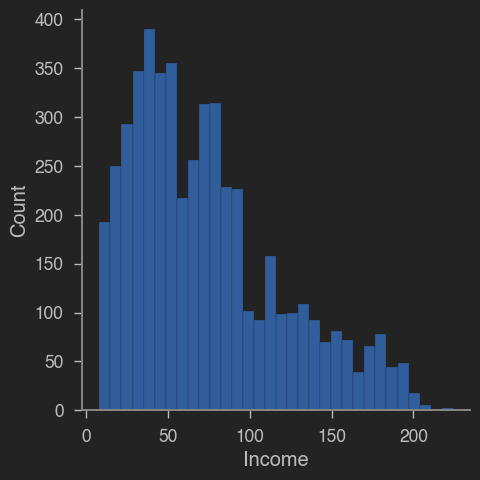

In [107]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K
sns.displot(bank_df['Income'])

In [108]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [109]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [112]:
# Mean income of customers who have personal loans is generally high ~ 144K and average CC of 3.9K



144.74583333333334

In [113]:
personalloans['CCAvg'].mean()

3.905354166666667

In [110]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Mean income of customers who have do not have personal loans is generally low ~ 66K and average CC of 1.7K

<AxesSubplot:xlabel='Income', ylabel='Count'>

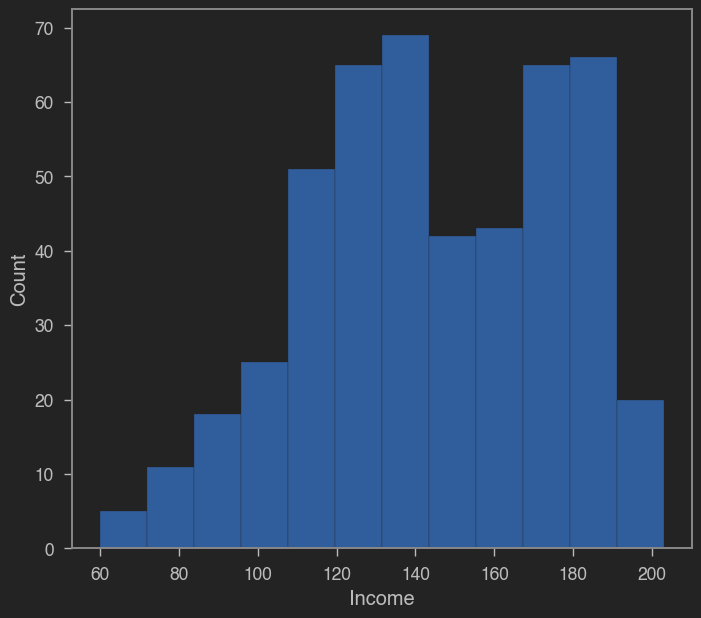

In [121]:
# Plot the distribution plot for both classes separately 
# Customers who took personal loans tend to have higher income
sns.histplot(data=personalloans,x='Income')


In [139]:
# Plot pairplot
plt.figure(figsize = (30, 30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [ ]:
# Correlation plot
# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income
plt.figure(figsize = (20, 20))


MINI CHALLENGE #3:
- Plot the distribution plot of the Average Credit Card Spending
- Plot the distribution of the average credit spending for each of the classes (personal loans = yes and personal loans = No) 

# TASK #5: PREPARE THE DATA BEFORE TRAINING THE MODEL

In [ ]:
# List all column names
bank_df.columns

In [ ]:
# Specify model input features (all data except for the target variable) 


In [ ]:
# Model output (target variable)


In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

In [ ]:
!pip install sklearn

In [ ]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [ ]:
# spliting the data into testing and training sets


In [ ]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

MINI CHALLENGE #4:
- Create a testing dataset that contains 30% of the data instead of 10%. 

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND GRADIENT DESCENT

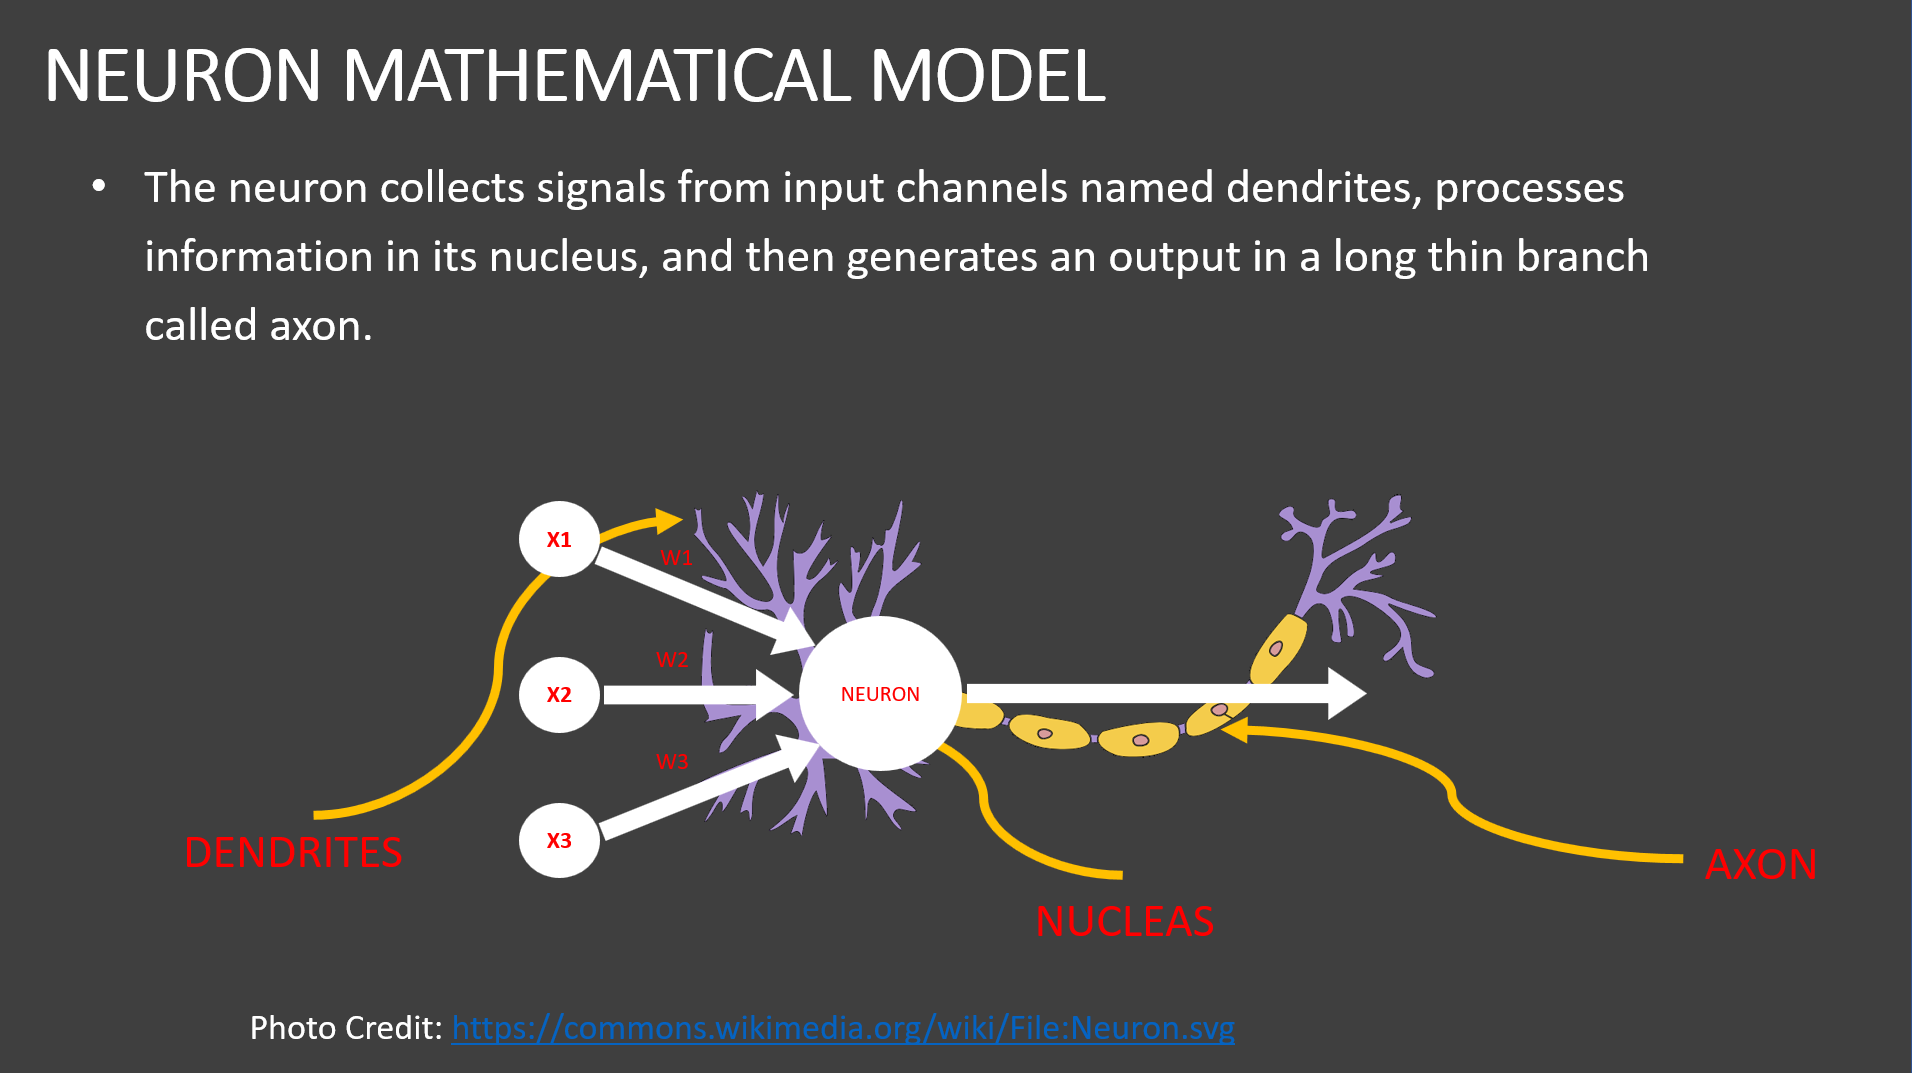

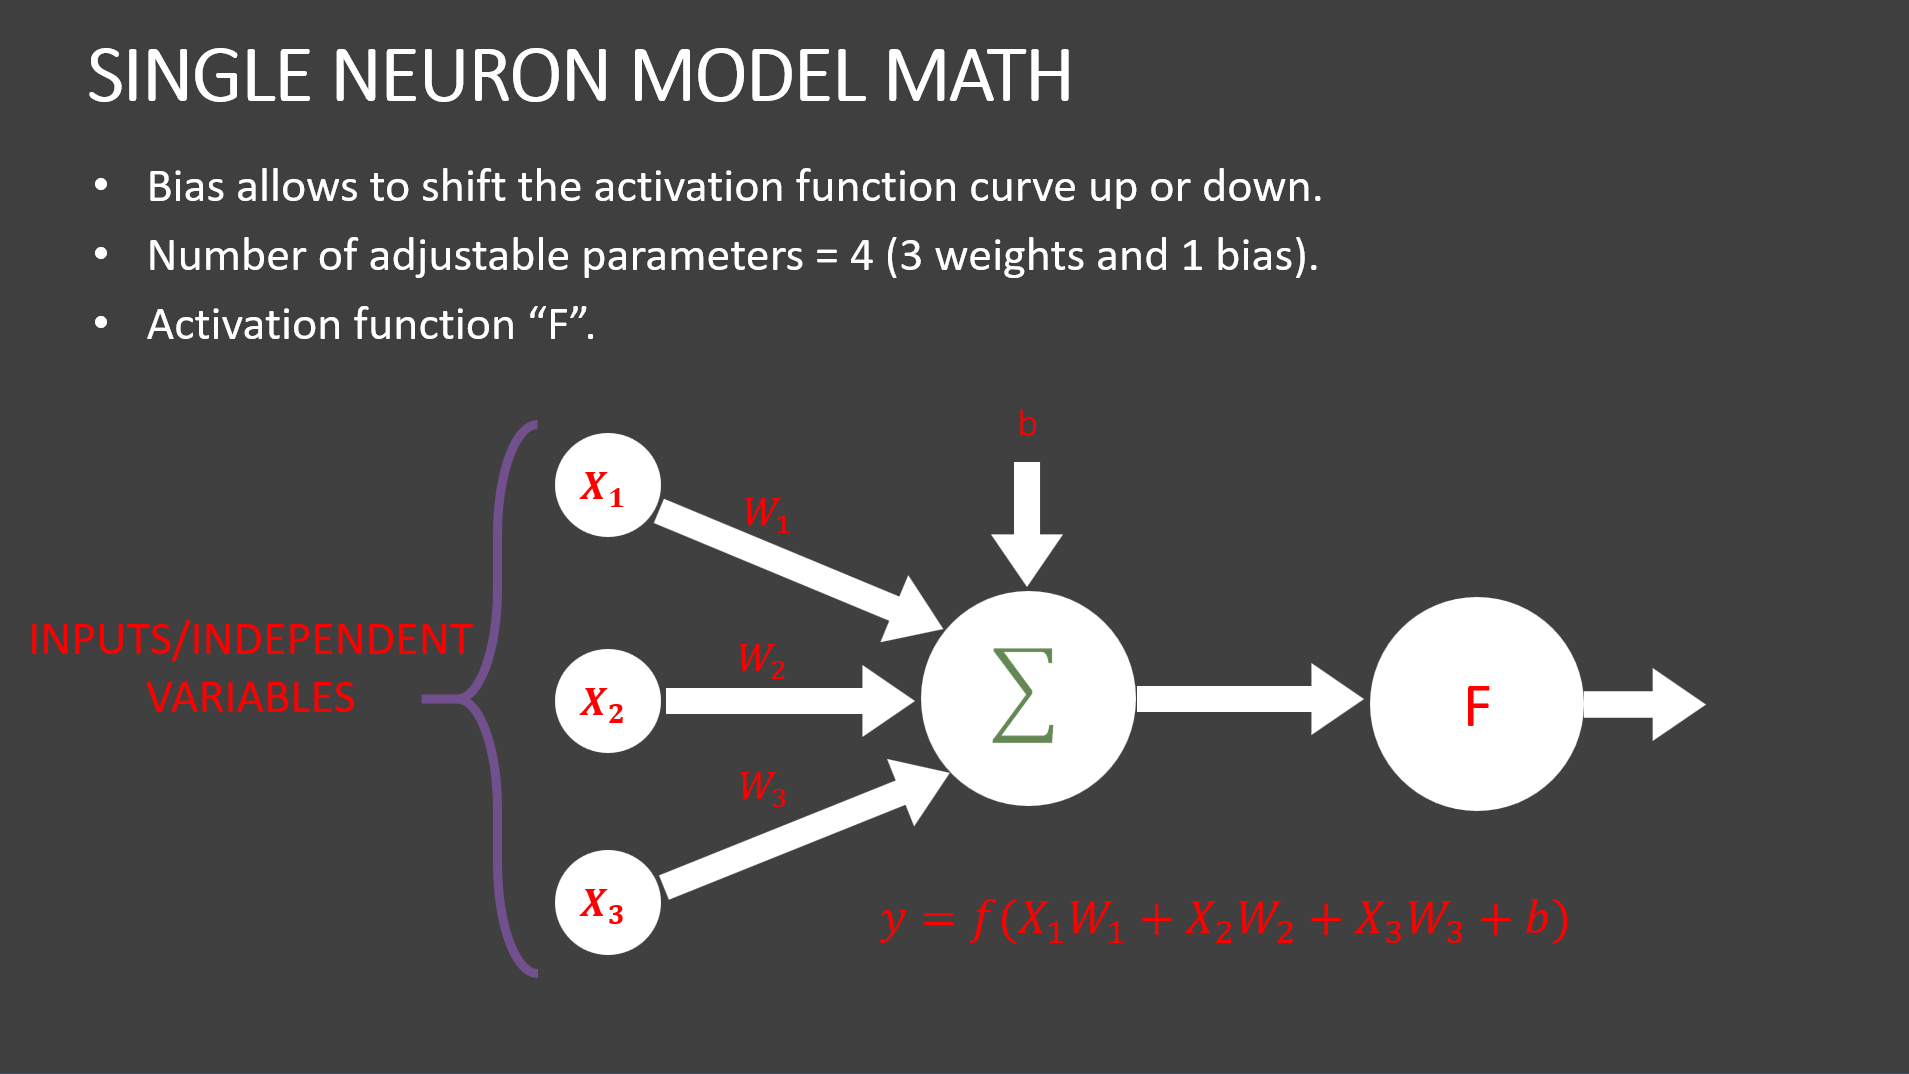

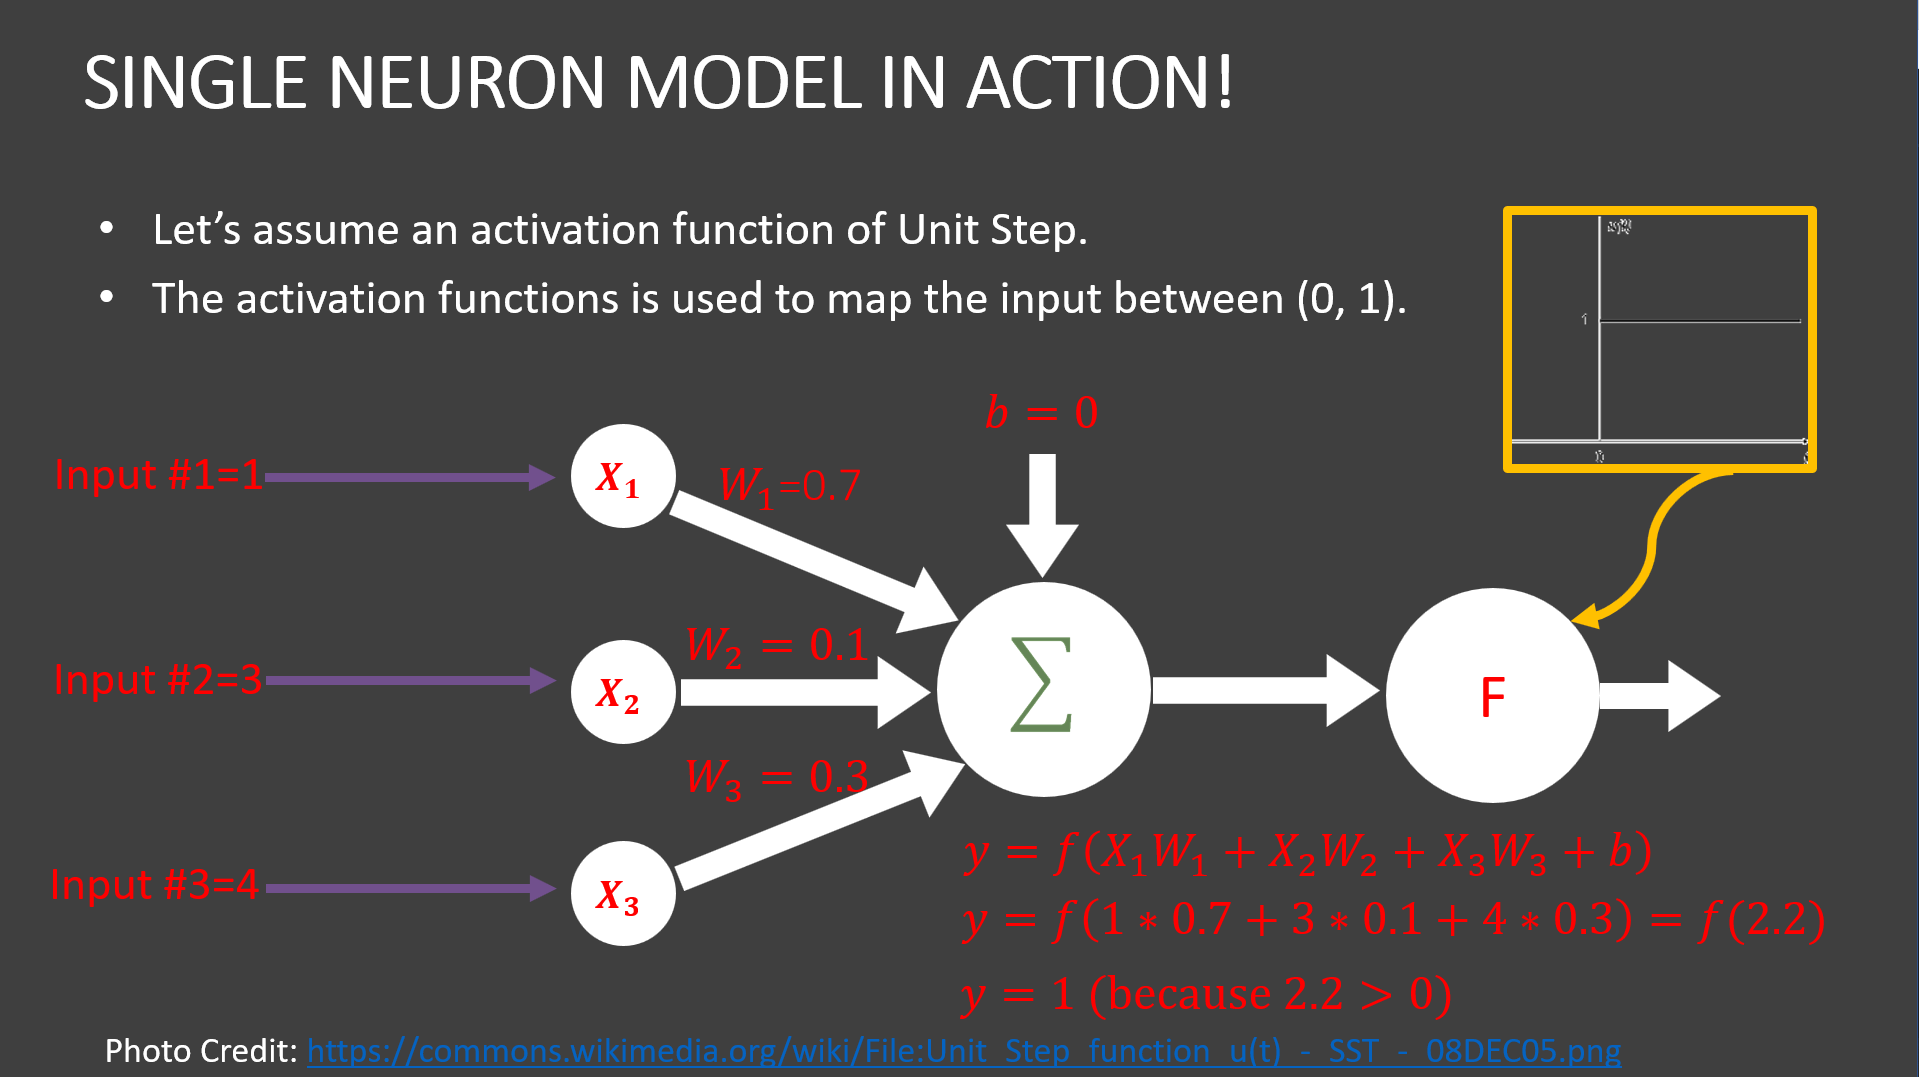

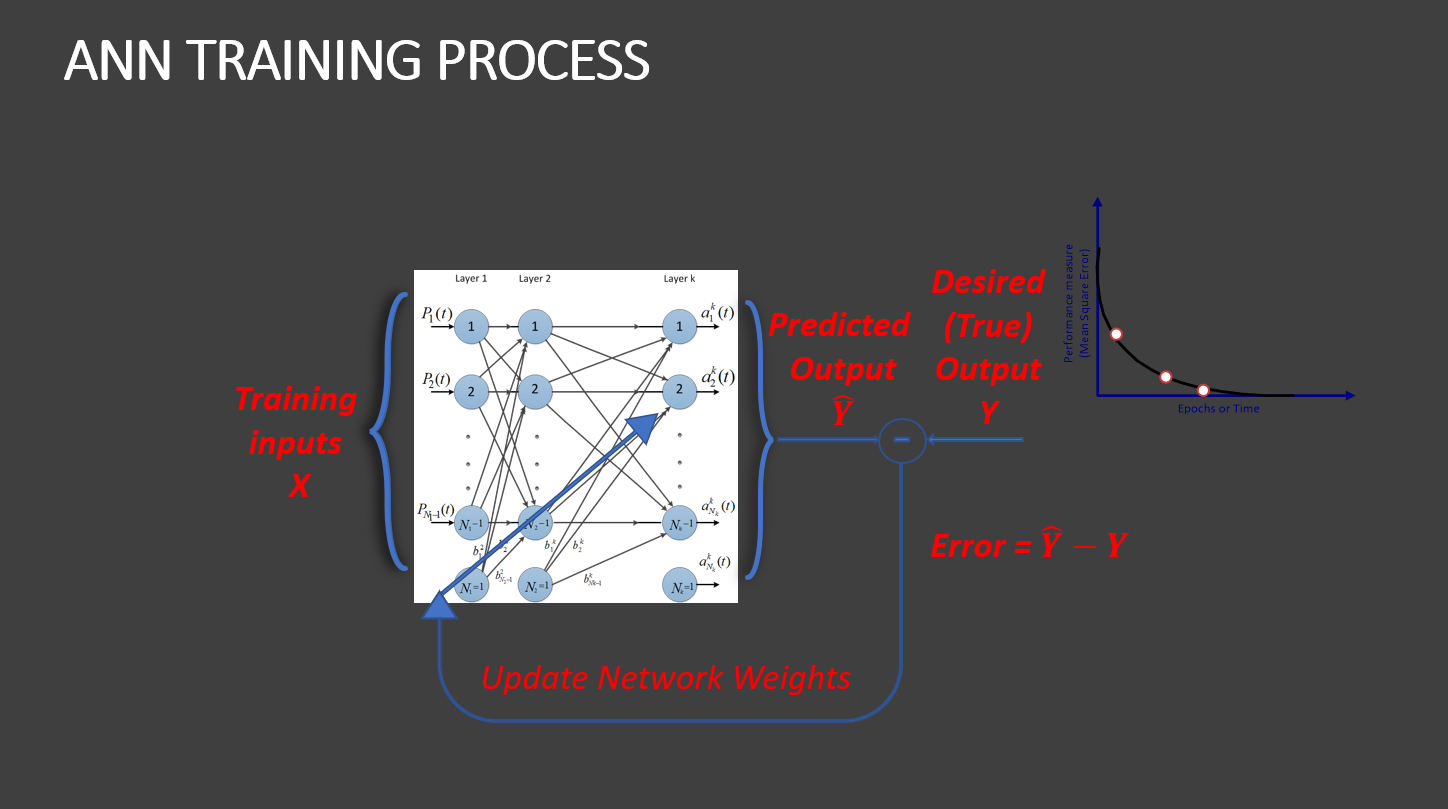

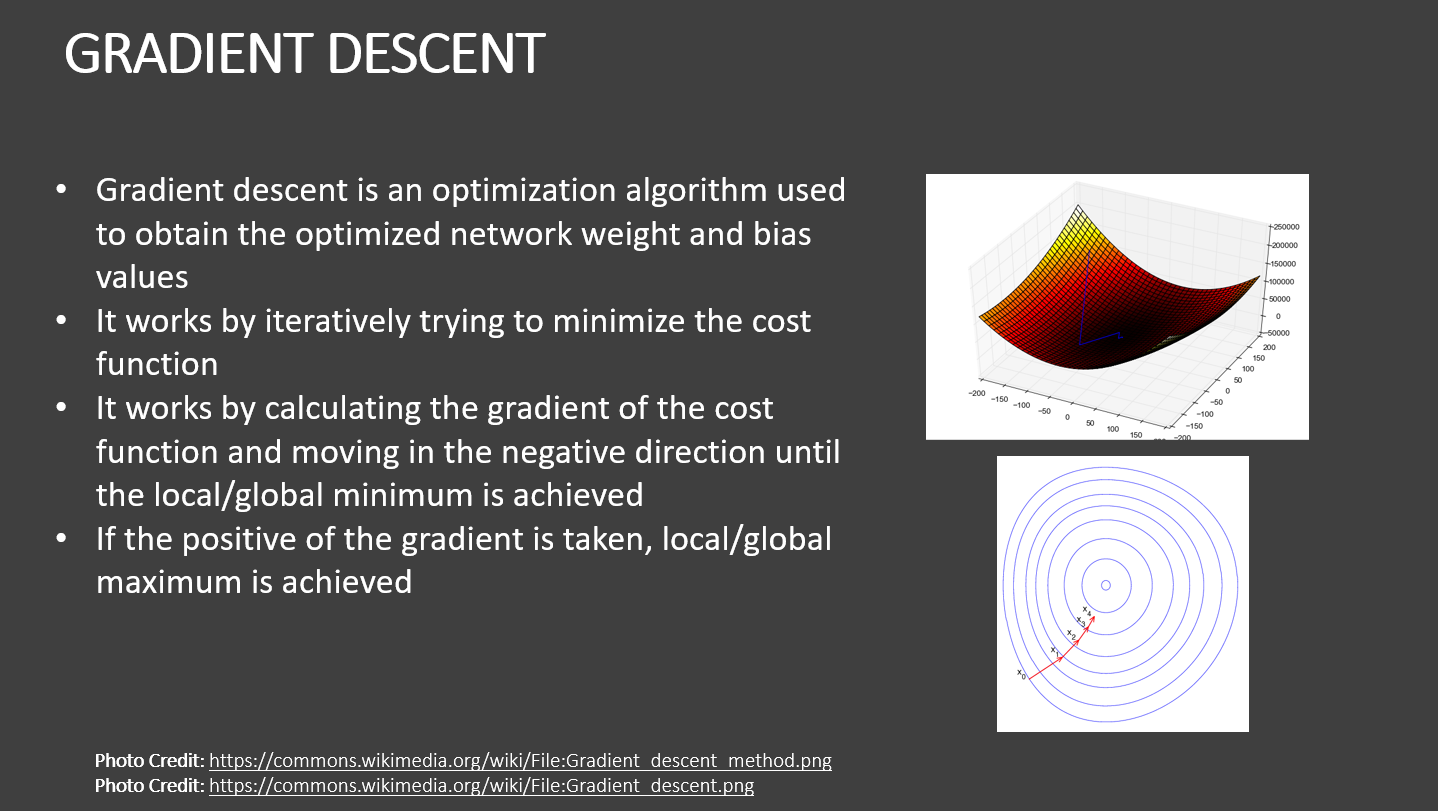

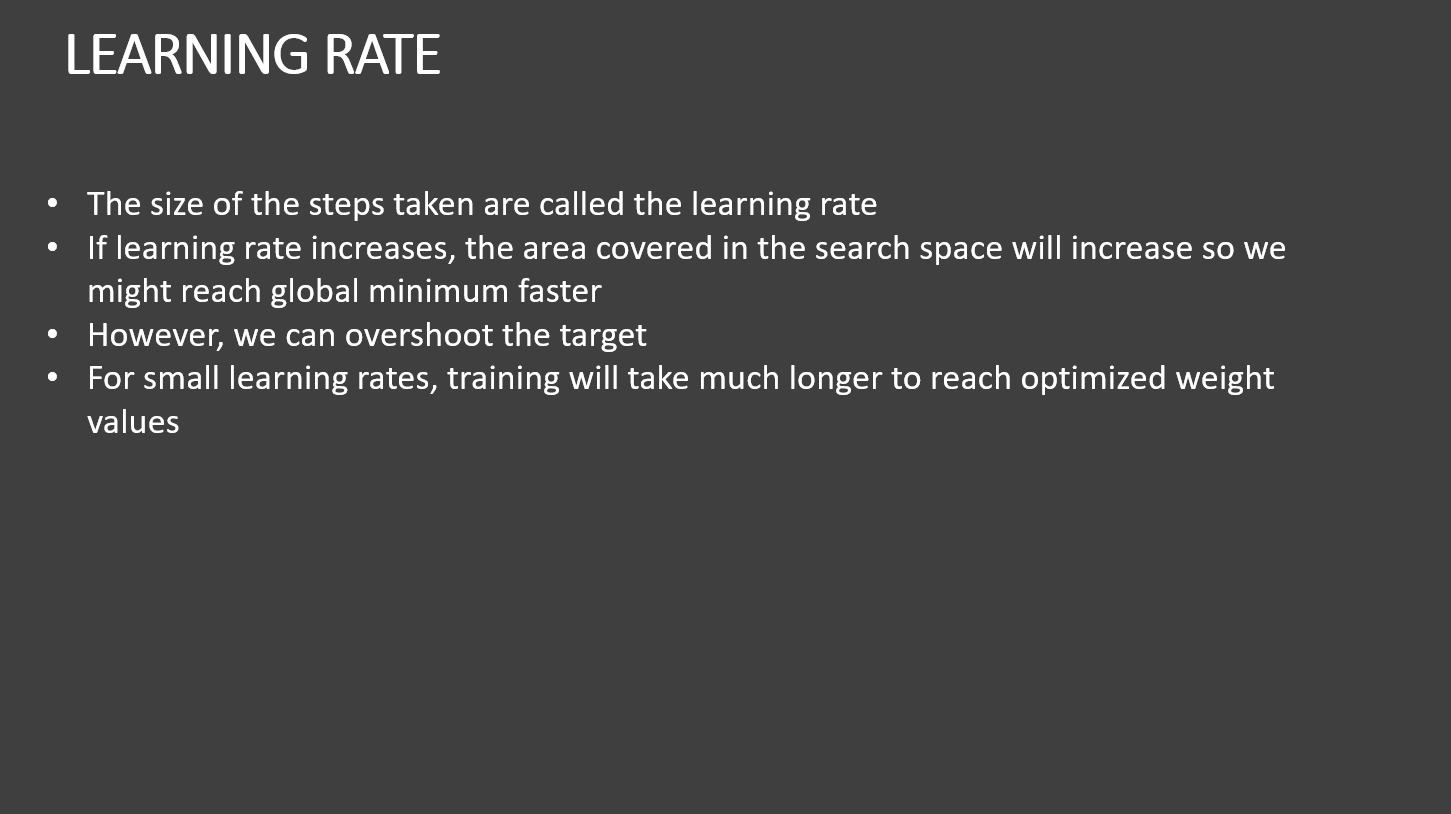

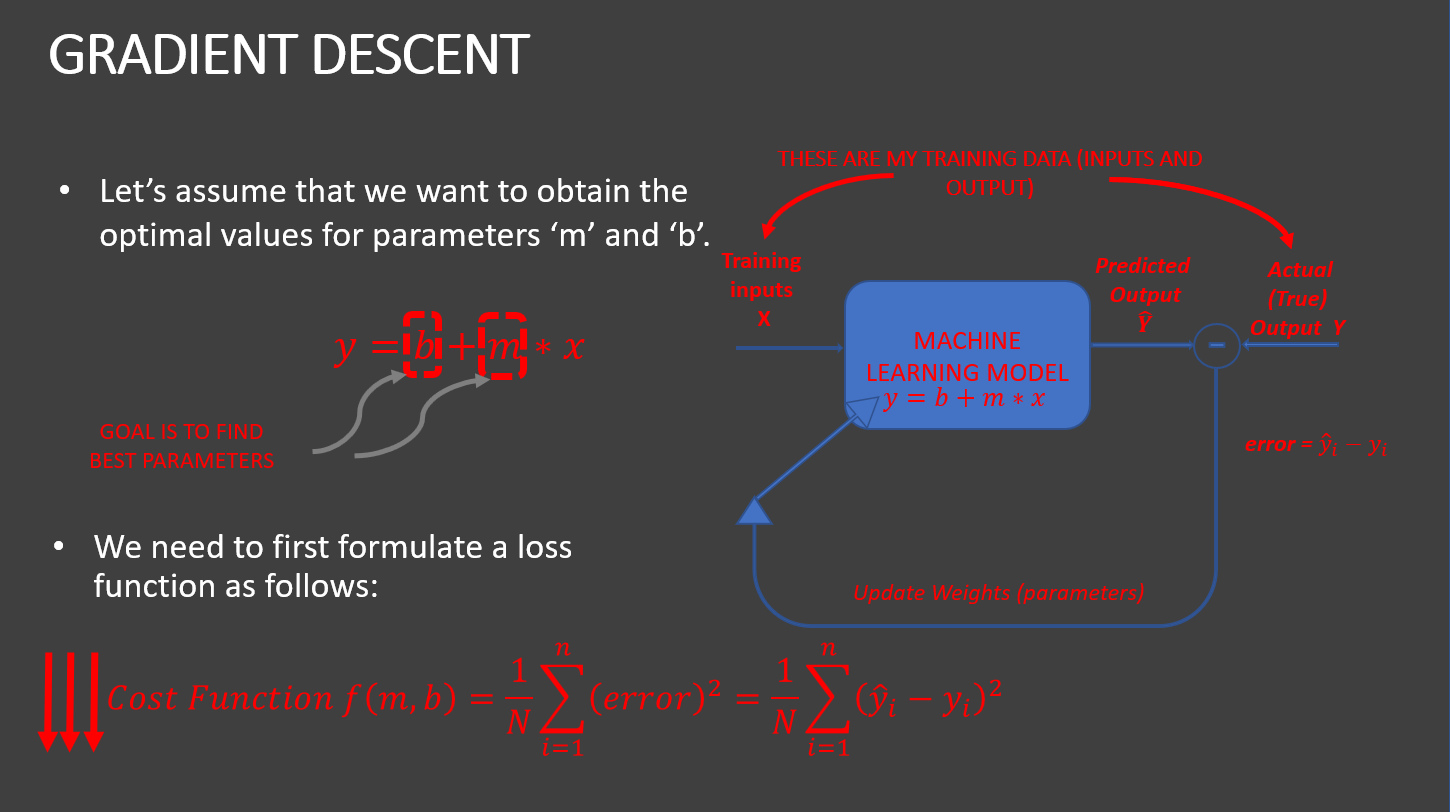

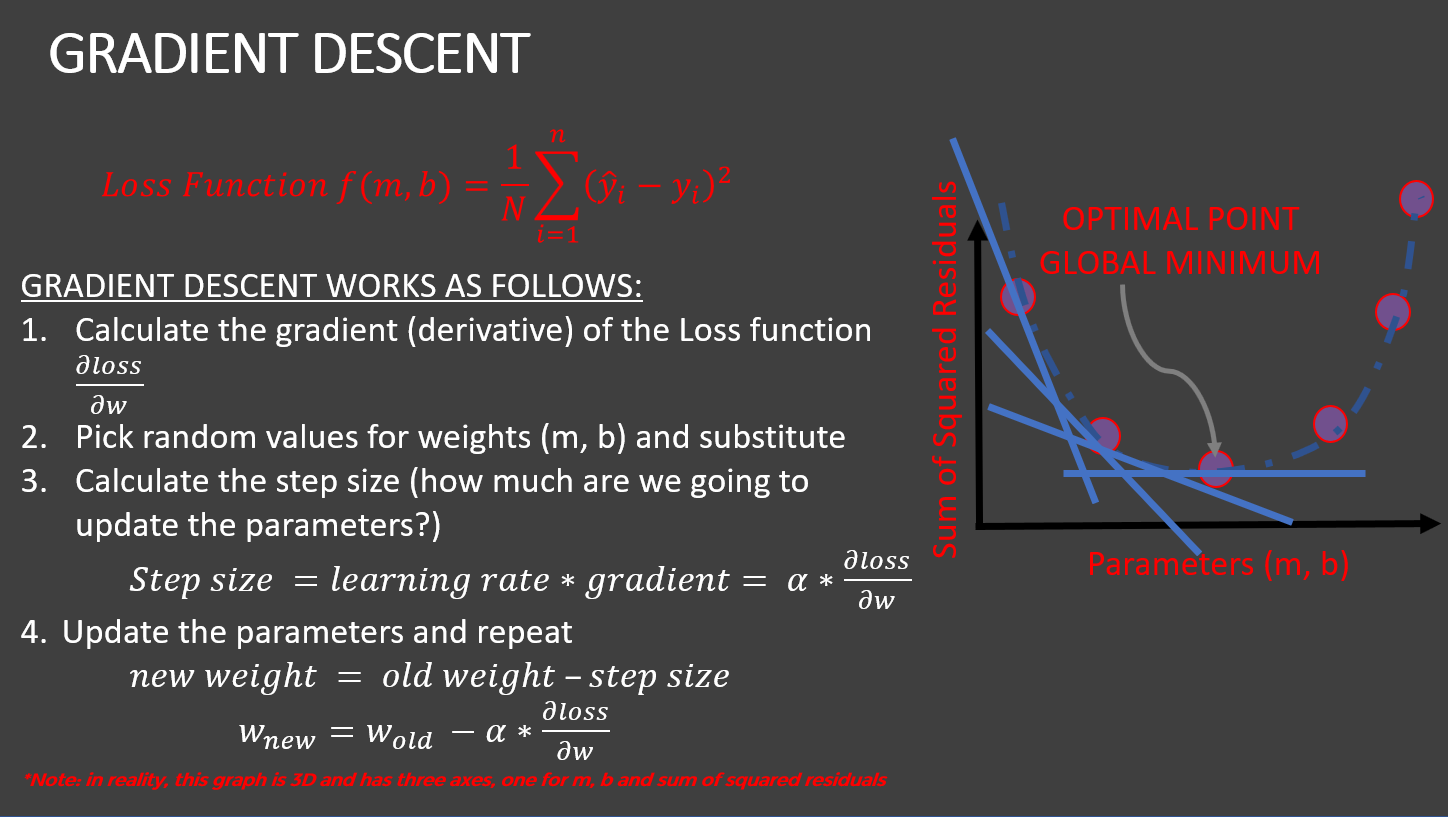

# TASK #7: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [ ]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))



# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

MINI CHALLENGE #5:
- Create a new model with an additional Fully connected layer with 500 neurons and linear activation function
- Print out the model summary. Roughly, how many trainable parameters have been newly introduced?

# TASK #8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [ ]:
# Compile the model


In [ ]:
# Plot the model performance across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

MINI CHALLENGE #6:
- Retrain the model using more number of epochs and a different validation datset

# TASK #9: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [ ]:
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

In [ ]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

In [ ]:
# Plot Confusion Matrix


In [ ]:
# Print out the classification report


# GREAT JOB!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1 SOLUTION:
- Use bank_df.head() to show the first 10 rows in a dataframe
- Show last 10 rows in the dataframe 
- How many samples are present in the Universal Bank Dataset?

In [ ]:
bank_df.head(10)

In [ ]:
bank_df.tail(10)
# There are 5000 samples in the dataset

MINI CHALLENGE #2 SOLUTION:
- What is the average age in this dataset?
- What is the % of customers who have credit cards?
- What is the % of customers who accepted the personal loan?

In [ ]:
# Average age in this dataset = 45.33 years

creditcard_customers = bank_df[bank_df['CreditCard'] == 1]
creditcard_customers

len(creditcard_customers)

# Total number of customers
len(bank_df)

CC_Customers_percent = len(creditcard_customers)/len(bank_df) * 100
print('Percentage of Customers who have credit cards is = ', CC_Customers_percent,'%')

In [ ]:
accepted_customers = bank_df[bank_df['Personal Loan'] == 1]
accepted_customers

len(accepted_customers)

# Total number of customers
len(bank_df)

accepted_customers_percent = len(accepted_customers)/len(bank_df) * 100
print('Percentage of Customers who accepted the personal loan offer = ', accepted_customers_percent,'%')

MINI CHALLENGE #3 SOLUTION:
- Plot the distribution plot of the Average Credit Card Spending
- Plot the distribution of the average credit spending for each of the classes (personal loans = yes and personal loans = No) 

In [ ]:
# Visualize the data
# Most customers Credit card spending is between 0-4K 
# Data is positively skewed 
plt.figure(figsize = (20, 10))
sns.distplot(bank_df['CCAvg'])

In [ ]:
# Plot the distribution plot for both classes separately 
# Customers who have large CC Average tend to have personal loans
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['CCAvg'], color = 'g')
sns.distplot(no_personalloans['CCAvg'], color = 'r')

MINI CHALLENGE #4 SOLUTION:
- Create a testing dataset that contains 30% of the data instead of 10%. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

MINI CHALLENGE #5 SOLUTION:
- Create a new model with an additional Fully connected layer with 500 neurons and linear activation function
- Print out the model summary. Roughly, how many trainable parameters have been newly introduced?

In [ ]:
# Create keras sequential model
ANN_model = keras.Sequential()

# Add dense layer
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.3))

# Add dense layer
ANN_model.add(Dense(500, activation = 'relu'))

# Add dropout layer
ANN_model.add(Dropout(0.4))

# Add dense layer
ANN_model.add(Dense(250, activation = 'linear'))

# Add dropout layer
ANN_model.add(Dropout(0.5))

# Add dense layer
ANN_model.add(Dense(500, activation = 'linear'))

# Add dense layer with softmax activation
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

MINI CHALLENGE #6 SOLUTION:
- Retrain the model using more number of epochs and a different validation datset

In [ ]:
history = ANN_model.fit(X_train, y_train, epochs = 30, validation_split = 0.3, verbose = 1)
